C:\Users\HP\AppData\Local\Temp\ipykernel_4572\16146496.py:25: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=(df<lowBound) | (df>upBound)


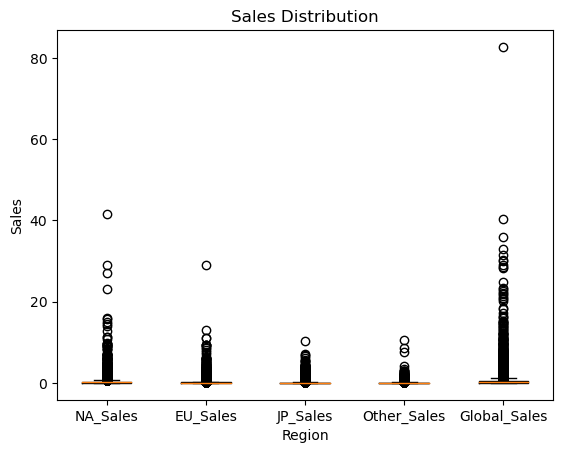

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,26,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,11,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
df=pd.read_csv('vgsales.csv')
df.head()
missing=df.isnull().sum()

#print(missing)
dup=df.duplicated()
dupRows=df[dup]
#print(dupRows)
df['Publisher'].fillna('Unknown',inplace=True)
average_year=df['Year'].mean()
df['Year'].fillna(average_year,inplace=True)
missing=df.isnull().sum()
#print(missing)

summary=df.describe()
Q1=summary.loc['25%']
Q3=summary.loc['75%']
IQR=Q3-Q1
lowBound=Q1-1.5*IQR
upBound=Q3+1.5*IQR
outliers=(df<lowBound) | (df>upBound)
outlierRows=df[outliers.any(axis=1)]
#print(outlierRows)


colPlot=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
plt.boxplot(df[colPlot])
plt.title('Sales Distribution')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(range(1,len(colPlot)+1),colPlot)
plt.show()


platformCol=df['Platform']
label_encoder=LabelEncoder()
encoded_platform_column=label_encoder.fit_transform(platformCol)
df['Platform']=encoded_platform_column

df.head()